<a href="https://colab.research.google.com/github/sonalimp29/Project-3/blob/main/Air_pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

21 Days lockdown pollution analysis with python


* Data here is based on  (CPCB - India Central Pollution Control Board) as well as the World Air Quality Index Project.

# Realtime pollution analysis

api : http://api.waqi.info/

Get your api key from here : https://aqicn.org/data-platform/token/#/

Getting data

In [1]:
import requests

In [2]:
city = 'mumbai'
url = 'http://api.waqi.info/feed/' + city + '/?token='
api_key = '3702b80457e03be725353e1aa367cd8813d19cc8'

main_url = url + api_key
r = requests.get(main_url)
data = r.json()['data']
data

{'aqi': 34,
 'attributions': [{'name': 'World Meteorological Organization - surface synoptic observations (WMO-SYNOP)',
   'url': 'http://worldweather.wmo.int'},
  {'logo': 'US-StateDepartment.png',
   'name': "U.S. Embassy and Consulates' Air Quality Monitor in India",
   'url': 'https://in.usembassy.gov/embassy-consulates/new-delhi/air-quality-data/'},
  {'name': 'World Air Quality Index Project', 'url': 'https://waqi.info/'}],
 'city': {'geo': [19.07283, 72.88261],
  'name': 'Mumbai US Consulate, India (मुंबई अमेरिकी वाणिज्य दूतावास)',
  'url': 'https://aqicn.org/city/india/mumbai/us-consulate'},
 'debug': {'sync': '2021-09-29T02:57:11+09:00'},
 'dominentpol': 'pm25',
 'forecast': {'daily': {'o3': [{'avg': 2,
     'day': '2021-09-26',
     'max': 10,
     'min': 1},
    {'avg': 1, 'day': '2021-09-27', 'max': 1, 'min': 1},
    {'avg': 2, 'day': '2021-09-28', 'max': 4, 'min': 1},
    {'avg': 4, 'day': '2021-09-29', 'max': 6, 'min': 3},
    {'avg': 3, 'day': '2021-09-30', 'max': 6, 'mi

Extracting air quality information

In [3]:
aqi = data['aqi']
iaqi = data['iaqi']

del iaqi['p']

for i in iaqi.items():
    print(i[0],':',i[1]['v'])


dew : 27
h : 100
pm25 : 34
t : 27
w : 2.3
wg : 8.7


In [4]:
dew = iaqi.get('dew','Nil')
no2 = iaqi.get('no2','Nil')
o3 = iaqi.get('o3','Nil')
so2 = iaqi.get('so2','Nil')
pm10 = iaqi.get('pm10','Nil')
pm25 = iaqi.get('pm25','Nil')

print(f'{city} AQI :',aqi,'\n')
print('Individual Air quality')
print('Dew :',dew)
print('no2 :',no2)
print('Ozone :',o3)
print('sulphur :',so2)
print('pm10 :',so2)
print('pm25 :',pm25)


mumbai AQI : 34 

Individual Air quality
Dew : {'v': 27}
no2 : Nil
Ozone : Nil
sulphur : Nil
pm10 : Nil
pm25 : {'v': 34}


Plotting pollutants graph


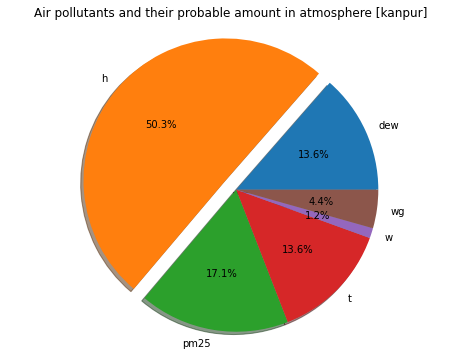

In [5]:
import matplotlib.pyplot as plt

pollutants = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]


# Exploding the first slice
explode = [0 for i in pollutants]
mx = values.index(max(values))  # explode 1st slice
explode[mx] = 0.1

# Plot a pie chart
plt.figure(figsize=(8,6))
plt.pie(values, labels=pollutants,explode=explode,autopct='%1.1f%%', shadow=True)

plt.title('Air pollutants and their probable amount in atmosphere [kanpur]')

plt.axis('equal')
plt.show()


Plotting location on the map using cartopy

Installing cartopy in colab

In [6]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 1s (36.5 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 155013 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state

In [7]:
!pip uninstall shapely
!pip install shapely --no-binary shapely

Found existing installation: Shapely 1.7.1
Uninstalling Shapely-1.7.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Shapely-1.7.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.7.1
     |████████████████████████████████| 383 kB 5.3 MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
    Running setup.py install for shapely ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Installing cartopy in normal python / anaconda


watch installation tutorial : [Installing Cartopy](https://youtu.be/qxSCoR9BO6A)

In [15]:
!pip install cartopy

Plotting a map of the city

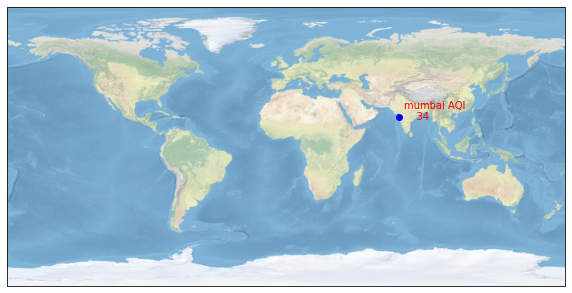

In [16]:
import cartopy.crs as ccrs

geo = data['city']['geo']

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.scatter(geo[1],geo[0],color='blue')
plt.text(geo[1] + 3,geo[0]-2,f'{city} AQI \n    {aqi}',color='red')

plt.show()


# Historical data analysis

dataset : http://aqicn.org/data-platform/register/

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read csv files into a dataframe

In [20]:
import pandas as pd


csv_path = '/content/drive/MyDrive/bandra,-mumbai, india-air-quality.csv'

df = pd.read_csv(csv_path)
df = df.head(50)
print(df)

         date  pm25  pm10    o3  no2  so2  co
0    2021/9/1   113    75   134    3    6   2
1    2021/9/2   114    75    11    3    5    
2    2021/9/3   105    77     8    3    5    
3    2021/9/4   110    75     6    3    5    
4    2021/9/5   107    75     6    3    5    
5    2021/9/6   108    75     5    3    5    
6    2021/9/7   109    75     4    3    5    
7    2021/9/8   112    75     3    3    4    
8    2021/9/9   105    75     3    3    3    
9   2021/9/10   112    75     3    3    4    
10  2021/9/11   108    75     3    3    4    
11  2021/9/12   114    75     2    3    4    
12  2021/9/13   109    75     3    3    4    
13  2021/9/14   109    75     3    3    4    
14  2021/9/15   114    75     3    3    4    
15  2021/9/16   114    75     4    3    4    
16  2021/9/17   106    78   180    3    8    
17  2021/9/18   104    74   169    3    7    
18  2021/9/19   116    74   138    3    7    
19  2021/9/20   107    74   119    3    6    
20  2021/9/21   107    75   101   

Renaming column names 

In [21]:
df.columns

df= df.rename(columns = {" pm25": "pm25", 
                         " pm10":"pm10", 
                         " o3": "o3",
                         ' no2' : 'no2',
                         ' so2' : 'so2',
                         ' co' : 'co'})

df.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

Extract dates of lockdown

In [22]:
df['date'] = pd.to_datetime(df.date)

df21 = df.loc[df['date'] > '2020-03-24']
df21 = df21.sort_values(by = 'date')
df21

,date,pm25,pm10,o3,no2,so2,co
24,2021-08-01,107,75,102,3,18,
25,2021-08-02,107,76,42,3,11,
26,2021-08-03,107,75,49,3,11,
27,2021-08-04,107,79,150,3,12,
28,2021-08-05,129,77,3,3,,
29,2021-08-06,133,73,249,3,20,
30,2021-08-07,130,76,113,3,21,
31,2021-08-08,147,79,150,3,13,
32,2021-08-09,186,75,171,3,5,
33,2021-08-10,118,75,262,3,5,


Remove any extra date apart from 21 days

In [23]:
df21.drop(13, inplace=True)
df21

,date,pm25,pm10,o3,no2,so2,co
24,2021-08-01,107,75,102,3,18,
25,2021-08-02,107,76,42,3,11,
26,2021-08-03,107,75,49,3,11,
27,2021-08-04,107,79,150,3,12,
28,2021-08-05,129,77,3,3,,
29,2021-08-06,133,73,249,3,20,
30,2021-08-07,130,76,113,3,21,
31,2021-08-08,147,79,150,3,13,
32,2021-08-09,186,75,171,3,5,
33,2021-08-10,118,75,262,3,5,


Filling all the empty cells with 0

In [24]:
df21.replace(' ', '0', inplace=True)
df21

,date,pm25,pm10,o3,no2,so2,co
24,2021-08-01,107,75,102,3,18,0
25,2021-08-02,107,76,42,3,11,0
26,2021-08-03,107,75,49,3,11,0
27,2021-08-04,107,79,150,3,12,0
28,2021-08-05,129,77,3,3,0,0
29,2021-08-06,133,73,249,3,20,0
30,2021-08-07,130,76,113,3,21,0
31,2021-08-08,147,79,150,3,13,0
32,2021-08-09,186,75,171,3,5,0
33,2021-08-10,118,75,262,3,5,0


Plotting the data

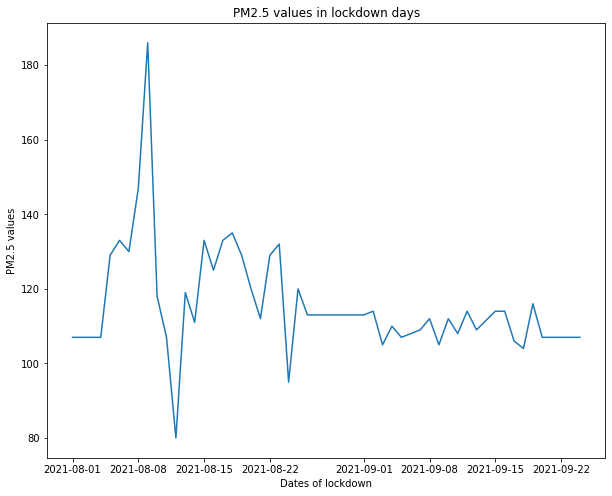

In [25]:
import matplotlib.pyplot as plt

dates = df21['date']
pm25 = df21['pm25']
pm25 = [int(i) for i in pm25]

plt.figure(figsize=(10,8))

length = len(dates)

plt.plot(dates,pm25)
plt.title('PM2.5 values in lockdown days')
plt.xlabel('Dates of lockdown')
plt.ylabel('PM2.5 values')
plt.show()

Extracting past 21 days before lockdown

In [27]:
mask = (df['date'] >= '2020-03-05') & (df['date']  < '2020-03-25')

past21 = df.loc[mask]
past21

,date,pm25,pm10,o3,no2,so2,co


Compairing the two

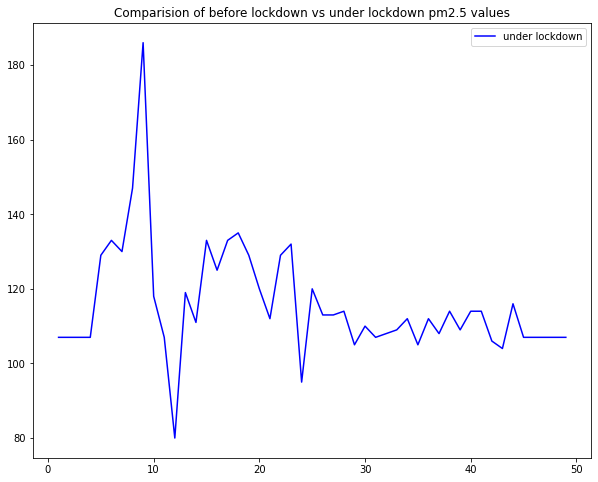

In [32]:
import matplotlib.pyplot as plt

dates = df21['date']
pm25_l = df21['pm25']
pm25_l = [int(i) for i in pm25]


pm25_n = past21['pm25']
pm25_n = [int(i) for i in pm25_n]

plt.figure(figsize=(10,8))

length = [i for i in range(1,len(dates)+1)]

plt.plot(length,pm25_l,color='blue',label='under lockdown')
#plt.plot(length,pm25_n,color='red',label='before lockdown')
plt.legend()
plt.title('Comparision of before lockdown vs under lockdown pm2.5 values')
plt.show()

Finding solutions to several questions

1> On which date pm2.5 value was minimum in kanpur under lockdown

In [29]:
df21['pm25'] = [int(i) for i in df21['pm25']]
print(df21[df21.pm25 == df21.pm25.min()]) 

         date  pm25 pm10  o3 no2 so2 co
35 2021-08-12    80   75   9   3   6  0


2> On which date o3 value was maximum in kanpur under lockdown

In [30]:
df21['o3'] = [int(i) for i in df21['o3']]
print(df21[df21.o3 == df21.o3.max()]) 

         date  pm25 pm10   o3 no2 so2 co
33 2021-08-10   118   75  262   3   5  0


3> What is the average value of so2 in the lockdown 

In [31]:
df21['so2'] = [int(i) for i in df21['so2']]
avgSo2 = df21['so2'].mean()
print('The average value of so2 :',avgSo2)

The average value of so2 : 6.591836734693878
